# Predição final para validação do modelo

In [23]:
import pandas as pd
import pickle 
import csv
import numpy as np

In [24]:
lexicon = np.loadtxt('csvs/lexicon_enriquecido.csv', skiprows=1, dtype='str', delimiter='\n')
def classificar_base(base):
    for word in lexicon:
        if word + ' ' in base:
            return 1
    
    base = [base]
    from sklearn.feature_extraction.text import CountVectorizer
    with open('vect.pkl', 'rb') as f:
        vect = pickle.load(f)
    base_trans = vect.transform(base)
    with open('model.pkl', 'rb') as f:
        model = pickle.load(f)
    classes = model.predict(base_trans)

    return classes

In [25]:
def run_classifier(base):
   result = base.applymap(lambda x: classificar_base(x))
   return result

In [26]:
base_lula = pd.read_csv('csvs/processados/odio_manual_lula.csv', usecols=['text'])

In [27]:
base_class= run_classifier(base_lula)

In [28]:
base_class = base_class.applymap(lambda x: np.sum(x))
pred_lula = base_class

In [29]:
true_lula = pd.read_csv('csvs/processados/odio_manual_lula.csv', usecols=['classe'])

In [30]:
from sklearn.metrics import accuracy_score
acuracia_lula = accuracy_score(true_lula ,pred_lula)

In [31]:
base_bolso = pd.read_csv('csvs/processados/odio_manual_bolsonaro.csv', usecols=['text'])

In [32]:
base_class = run_classifier(base_bolso)

In [33]:
base_class = base_class.applymap(lambda x: np.sum(x))
pred_bolso = base_class

In [34]:
true_bolso = pd.read_csv('csvs/processados/odio_manual_bolsonaro.csv', usecols=['classe'])

In [35]:
acuracia_bolso = accuracy_score(true_bolso, pred_bolso)

In [36]:
pred_lula.value_counts()

text
0       75
1       25
dtype: int64

In [37]:
true_lula.value_counts()

classe
0         86
1         14
dtype: int64

In [38]:
pred_bolso.value_counts()

text
0       51
1       49
dtype: int64

In [39]:
true_bolso.value_counts()

classe
0         84
1         16
dtype: int64

In [40]:
pred_all = pd.concat([pred_lula, pred_bolso])
true_all = pd.concat([true_lula, true_bolso]) 

In [47]:
true_all.value_counts()

classe
0         170
1          30
dtype: int64

In [48]:
pred_all.value_counts()

text
0       126
1        74
dtype: int64

In [42]:
from sklearn.metrics import f1_score
f1_score(true_all, pred_all)

0.42307692307692313

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(true_all, pred_all)

0.7

In [45]:
from sklearn.metrics import precision_score
precision_score(true_all, pred_all)

0.2972972972972973

In [46]:
from sklearn.metrics import recall_score
recall_score(true_all, pred_all)

0.7333333333333333

<AxesSubplot: >

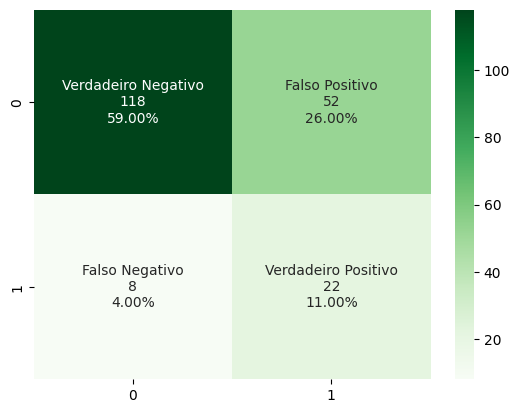

In [44]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(true_all, pred_all)

import seaborn as sns
group_names = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')